In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img_cv = cv2.imread("images/lenna.png")

In [3]:
img_cv.shape

(512, 512, 3)

In [4]:
cv2.imshow("Lenna", img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Extract the pixel at 135, 70

In [6]:
img_new = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

In [7]:
px1 = img_new[135,70]

In [8]:
px1

array([150,  52,  77], dtype=uint8)

TypeError: Invalid shape (3,) for image data

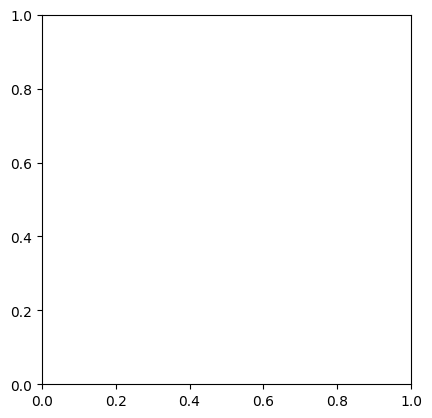

In [9]:
plt.imshow(px1);

In [10]:
img_new.shape

(512, 512, 3)

In [11]:
px1.shape

(3,)

In [12]:
px1 = px1.reshape(1,1,3)

In [13]:
px1

array([[[150,  52,  77]]], dtype=uint8)

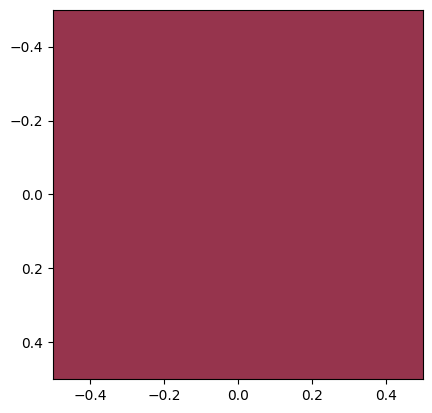

In [14]:
plt.imshow(px1)

In [27]:
img_new[100,100] = [255,255,255]

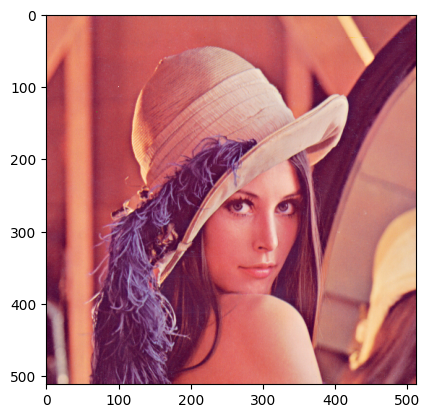

In [28]:
plt.imshow(img_new)

In [24]:
img_new

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [29]:
img_new[256] = [255,255,255]

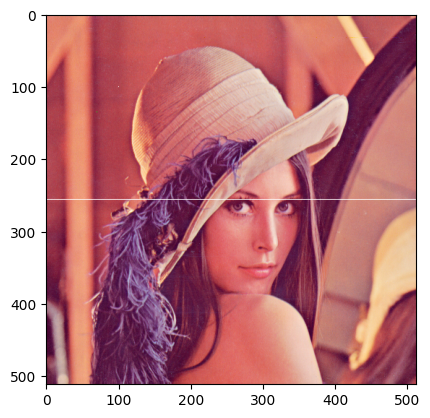

In [30]:
plt.imshow(img_new)

In [31]:
for i in range(512):
    for j in range(512):
        if (i + j ) % 2 == 0:
            img_new[i, j] = [255, 255, 255] 

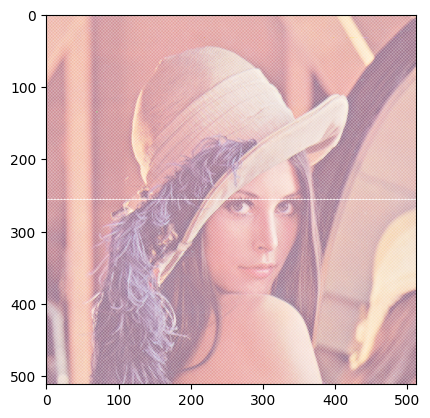

In [32]:
plt.imshow(img_new)

##### Video Processing

In [34]:
vid = cv2.VideoCapture("images/robots.mp4")

In [35]:
vid

< cv2.VideoCapture 0x751518530830>

In [36]:
ret, frame = vid.read()

In [37]:
ret

True

In [38]:
frame

array([[[ 19,  14,  13],
        [ 19,  14,  13],
        [ 19,  14,  13],
        ...,
        [ 48,  43,  23],
        [ 48,  43,  23],
        [ 48,  43,  23]],

       [[ 19,  14,  13],
        [ 19,  14,  13],
        [ 19,  14,  13],
        ...,
        [ 48,  43,  23],
        [ 48,  43,  23],
        [ 48,  43,  23]],

       [[ 19,  14,  13],
        [ 19,  14,  13],
        [ 19,  14,  13],
        ...,
        [ 48,  43,  23],
        [ 48,  43,  23],
        [ 48,  43,  23]],

       ...,

       [[164, 167, 178],
        [164, 167, 178],
        [164, 167, 178],
        ...,
        [142, 143, 161],
        [142, 143, 161],
        [142, 143, 161]],

       [[164, 167, 178],
        [164, 167, 178],
        [164, 167, 178],
        ...,
        [142, 143, 161],
        [142, 143, 161],
        [142, 143, 161]],

       [[164, 167, 178],
        [164, 167, 178],
        [164, 167, 178],
        ...,
        [143, 144, 162],
        [143, 144, 162],
        [143, 144, 162]]

In [39]:
cv2.imshow("Frame-1", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
frame.shape

(640, 640, 3)

In [43]:
width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = vid.get(cv2.CAP_PROP_FPS)
total = vid.get(cv2.CAP_PROP_FRAME_COUNT)

In [45]:
print("Width:", int(width))
print("Height:", int(height))
print("Frame Rate:", int(fps))
print("Total Frames:", int(total))

Width: 640
Height: 640
Frame Rate: 30
Total Frames: 1799


In [47]:
# Show the video

vid = cv2.VideoCapture("images/robots.mp4")
while True:
    ret, frame = vid.read()
    if ret == False:
        break

    cv2.imshow("Robots", frame)
    if cv2.waitKey(5) == ord('q'):
        break

cv2.destroyAllWindows()

In [53]:
# Save the frames
count = 0
vid = cv2.VideoCapture("images/robots.mp4")
while True:
    ret, frame = vid.read()
    if ret == False:
        break

    cv2.imshow("Robots", frame)
    if cv2.waitKey(5) == ord('q'):
        break

    cv2.imwrite(f'images/robot_images/robot{count}.jpg', frame)
    count += 1

cv2.destroyAllWindows()

In [54]:
time = "00:00:42.00"

In [57]:
hrs, mins, secs = [float(i) for i in time.split(":")]

In [58]:
hrs

0.0

In [59]:
secs

42.0

In [60]:
trigger_frame = hrs * 3600 + mins * 60 + secs * fps

In [61]:
trigger_frame

1260.0

In [62]:
vid.set(1, trigger_frame)

True

In [65]:
ret, new_frame = vid.read()

In [66]:
cv2.imshow("Trigger Frame", new_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# Capture the video from built-in camera

vid = cv2.VideoCapture(0)
while True:
    ret, frame = vid.read()
    if ret == False:
        break

    cv2.imshow("Robots", frame)
    if cv2.waitKey(5) == ord('q'):
        break

cv2.destroyAllWindows()
vid.release()

In [22]:
size = (640,480)
writer = cv2.VideoWriter(filename="myvideo.avi", 
                         fourcc=cv2.VideoWriter_fourcc(*"MJPG"), 
                         fps=30, frameSize=size)

In [23]:
vid = cv2.VideoCapture(0)
while True:
    ret, frame = vid.read()
    if ret == False:
        break

    cv2.imshow("Robots", frame)
    if cv2.waitKey(5) == ord('q'):
        break

    writer.write(frame)

writer.release()
cv2.destroyAllWindows()
vid.release()

In [14]:
help(cv2.VideoWriter)

Help on class VideoWriter in module cv2:

class VideoWriter(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  get(...)
 |      get(propId) -> retval
 |      .   @brief Returns the specified VideoWriter property
 |      .   
 |      .        @param propId Property identifier from cv::VideoWriterProperties (eg. cv::VIDEOWRITER_PROP_QUALITY)
 |      .        or one of @ref videoio_flags_others
 |      .   
 |      .        @return Value for the specified property. Value 0 is returned when querying a property that is
 |      .        not supported by the backend used by the VideoWriter instance.
 |  
 |  getBackendName(...)
 |      getBackendName() -> retval
 |      .   @brief Returns used backend API name
 |      .   
 |      .        @note Stream should be opened.
 |  
 |  isOpened(...)
 |      isOpened() -> retval
 |  